In [4]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [5]:
df = pd.read_excel("../data/example_output/Распределенные счета на оплату 3800-2023.xlsx")
df = df.drop([
    'Год счета', 
    'Позиция счета', 
    'Номер позиции распределения', 
    'Дата отражения в учетной системе', 
    'Признак "Использование в основной деятельности"', 
    'Признак "Способ использования"', 
    'Площадь', 
    'Сумма распределения'
    ], axis=1)


In [6]:
another_df = pd.read_excel("../data/example_output/Распределенные счета на оплату 4200-4000-3800-2024.xlsx")
another_df = another_df.drop([
    'Год счета', 
    'Позиция счета', 
    'Номер позиции распределения', 
    'Дата отражения в учетной системе', 
    'Признак "Использование в основной деятельности"', 
    'Признак "Способ использования"', 
    'Площадь', 
    'Сумма распределения'
    ], axis=1)

In [7]:
concated_df = pd.concat([df, another_df])
concated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870677 entries, 0 to 447106
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Компания               870677 non-null  int64  
 1   Номер счета            870677 non-null  int64  
 2   ID договора            870677 non-null  object 
 3   Услуга                 870677 non-null  int64  
 4   Класс услуги           870677 non-null  object 
 5   Здание                 854986 non-null  object 
 6   Класс ОС               860614 non-null  object 
 7   ID основного средства  870677 non-null  int64  
 8   Счет главной книги     807677 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 66.4+ MB


In [8]:
another_df = pd.read_excel("../data/example_output/Распределенные счета на оплату 5400-2023.xlsx")
another_df = another_df.drop([
    'Год счета', 
    'Позиция счета', 
    'Номер позиции распределения', 
    'Дата отражения в учетной системе', 
    'Признак "Использование в основной деятельности"', 
    'Признак "Способ использования"', 
    'Площадь', 
    'Сумма распределения'
    ], axis=1)
concated_df = pd.concat([concated_df, another_df])
concated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1261956 entries, 0 to 391278
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Компания               1261956 non-null  int64  
 1   Номер счета            1261956 non-null  int64  
 2   ID договора            1261956 non-null  object 
 3   Услуга                 1261956 non-null  int64  
 4   Класс услуги           1261956 non-null  object 
 5   Здание                 1246265 non-null  object 
 6   Класс ОС               1240532 non-null  object 
 7   ID основного средства  1261956 non-null  int64  
 8   Счет главной книги     1155218 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 96.3+ MB


In [9]:
another_df = pd.read_excel("../data/example_output/Распределенные счета на оплату 5400-2024.xlsx")
another_df = another_df.drop([
    'Год счета', 
    'Позиция счета', 
    'Номер позиции распределения', 
    'Дата отражения в учетной системе', 
    'Признак "Использование в основной деятельности"', 
    'Признак "Способ использования"', 
    'Площадь', 
    'Сумма распределения'
    ], axis=1)
concated_df = pd.concat([concated_df, another_df])
concated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1385160 entries, 0 to 123203
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Компания               1385160 non-null  int64  
 1   Номер счета            1385160 non-null  int64  
 2   ID договора            1385160 non-null  object 
 3   Услуга                 1385160 non-null  int64  
 4   Класс услуги           1385160 non-null  object 
 5   Здание                 1369469 non-null  object 
 6   Класс ОС               1360641 non-null  object 
 7   ID основного средства  1385160 non-null  int64  
 8   Счет главной книги     1264077 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 105.7+ MB


In [10]:
another_df = pd.read_excel("../data/example_output/Распределенные счета на оплату 5500-2023.xlsx")
another_df = another_df.drop([
    'Год счета', 
    'Позиция счета', 
    'Номер позиции распределения', 
    'Дата отражения в учетной системе', 
    'Признак "Использование в основной деятельности"', 
    'Признак "Способ использования"', 
    'Площадь', 
    'Сумма распределения'
    ], axis=1)
concated_df = pd.concat([concated_df, another_df])
concated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1757716 entries, 0 to 372555
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Компания               int64  
 1   Номер счета            int64  
 2   ID договора            object 
 3   Услуга                 int64  
 4   Класс услуги           object 
 5   Здание                 object 
 6   Класс ОС               object 
 7   ID основного средства  int64  
 8   Счет главной книги     float64
dtypes: float64(1), int64(4), object(4)
memory usage: 134.1+ MB


In [11]:
concated_df = concated_df.dropna()
concated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589973 entries, 0 to 372555
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Компания               1589973 non-null  int64  
 1   Номер счета            1589973 non-null  int64  
 2   ID договора            1589973 non-null  object 
 3   Услуга                 1589973 non-null  int64  
 4   Класс услуги           1589973 non-null  object 
 5   Здание                 1589973 non-null  object 
 6   Класс ОС               1589973 non-null  object 
 7   ID основного средства  1589973 non-null  int64  
 8   Счет главной книги     1589973 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 121.3+ MB


In [12]:
cat_features = ['Компания', 'Номер счета', 'ID договора', 'Услуга', 'Класс услуги', 'Здание', 'Класс ОС', 'ID основного средства']
# Разделим данные на признаки (X) и целевую переменную (y)
X = concated_df.drop(columns=['Счет главной книги'])
y = concated_df['Счет главной книги']

# Преобразуем целевую переменную в категориальные значения
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создадим Pool для CatBoost
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

# Определим и обучим модель CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    cat_features=cat_features,
    verbose=10
)

# Обучение модели
model.fit(train_pool)


0:	learn: 1.4496333	total: 21.3s	remaining: 35m 6s
10:	learn: 0.3160918	total: 3m 46s	remaining: 30m 33s
20:	learn: 0.1095871	total: 7m 11s	remaining: 27m 3s
30:	learn: 0.0421521	total: 10m 25s	remaining: 23m 11s
40:	learn: 0.0172780	total: 13m 39s	remaining: 19m 39s
50:	learn: 0.0079156	total: 17m 2s	remaining: 16m 22s
60:	learn: 0.0039364	total: 20m 24s	remaining: 13m 2s
70:	learn: 0.0025325	total: 23m 51s	remaining: 9m 44s
80:	learn: 0.0018241	total: 27m 16s	remaining: 6m 23s
90:	learn: 0.0014424	total: 30m 42s	remaining: 3m 2s
99:	learn: 0.0012595	total: 33m 48s	remaining: 0us


In [16]:
# Предсказания на тестовых данных
y_pred = model.predict(test_pool)

# Преобразуем предсказания обратно в оригинальные значения
#y_pred = label_encoder.inverse_transform(y_pred)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9999465400399378


In [20]:
model.save_model("../main_bills_predict.cbm", format="cbm")

In [28]:

y_test = label_encoder.fit_transform(y_test)
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.fit_transform(y_pred)
y_pred = label_encoder.inverse_transform(y_pred)



[7.04840601e+09 7.04820901e+09 7.04820901e+09 ... 7.04820901e+09
 7.04820901e+09 7.04820901e+09]


In [30]:
import matplotlib.pyplot as plt

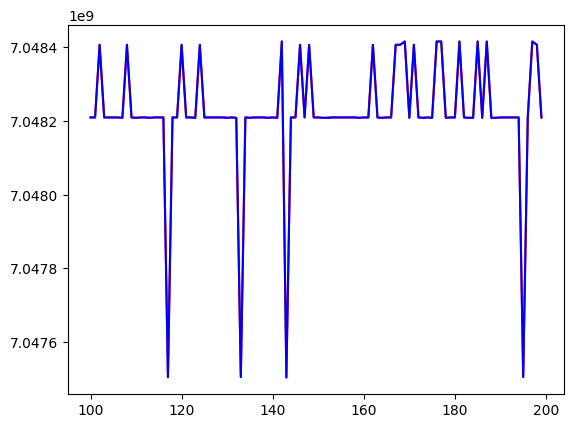

[7048209010, 7048209010, 7048406010, 7048209010, 7048209010, 7048209010, 7048209010, 7048208010, 7048406010, 7048209010, 7048208010, 7048209010, 7048209010, 7048208010, 7048209010, 7048209010, 7048209010, 7047505010, 7048209010, 7048209010, 7048406010, 7048209010, 7048209010, 7048208010, 7048406010, 7048209010, 7048209010, 7048209020, 7048209010, 7048209010, 7048208010, 7048209010, 7048208010, 7047505010, 7048209010, 7048208010, 7048209010, 7048209010, 7048209010, 7048208010, 7048209010, 7048208010, 7048414960, 7047504010, 7048209010, 7048209010, 7048406010, 7048209010, 7048406010, 7048209010, 7048209010, 7048208010, 7048208010, 7048209010, 7048209010, 7048209010, 7048209010, 7048209010, 7048209010, 7048208010, 7048209010, 7048209010, 7048406010, 7048209010, 7048208010, 7048209010, 7048209010, 7048406010, 7048406010, 7048414960, 7048208010, 7048406010, 7048209010, 7048208010, 7048209010, 7048208010, 7048414960, 7048414960, 7048208010, 7048209010, 7048209010, 7048414960, 7048209010, 704

In [37]:
fig, ax = plt.subplots()
ax.plot([x for x in range(100, 200)], y_pred[100:200], color="r")
ax.plot([x for x in range(100, 200)], y_test[100:200], color="b")
plt.show()  

print([int(x) for x in y_pred[100:200]])